### DEMAPP01 
# Approximating functions on R

This demo illustrates how to use CompEcon Toolbox routines to construct and operate with an approximant for a function defined on an interval of the real line.

In particular, we construct an approximant for $f(x)=\exp(-x)$ on the interval $[-1,1]$.  The function used in this illustration posseses a closed-form, which will allow us to measure approximation error precisely. Of course, in practical applications, the function to be approximated will not possess a known closed-form.

In order to carry out the exercise, one must first code the function to be approximated at arbitrary points.
Let's begin:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, BasisSpline, demo 

### Preliminary tasks

Function to be approximated and derivatives

In [2]:
def f(x): return np.exp(-x)
def d1(x): return -np.exp(-x)
def d2(x): return np.exp(-x)

Set degree and domain of interpolation

In [3]:
n, a, b = 10, -1, 1

### Choose an approximation scheme.

#### Chebyshev interpolation

In this case, let us use an order 10 Chebychev approximation scheme:

In [5]:
F = BasisChebyshev(n, a, b, f=f)

One may now evaluate the approximant at any point x calling the basis:

In [6]:
x = 0
ffit = F(x)

... one may also evaluate the approximant's first and second derivatives at x:

In [7]:
dfit1 = F(x, 1)
dfit2 = F(x, 2)

... and one may even evaluate the approximant's definite integral between the left endpoint a and x:

In [8]:
intfit = F(x, -1)

###  Compare analytic and numerical computations

In [9]:
print('Function Values, Derivatives and Definite Integral of exp(-x) at x=0')
print('%-20s %12s %12s' % (' ', 'Numerical', 'Analytic'))
print('%-20s %12.8f %12.8f' % ('Function', ffit, f(x)))
print('%-20s %12.8f %12.8f' % ('First Derivative', dfit1,  d1(x)))
print('%-20s %12.8f %12.8f' % ('Second Derivative', dfit2,  d2(x)))
print('%-20s %12.8f %12.8f' % ('Definite Integral', intfit,  np.exp(1)-1))

Function Values, Derivatives and Definite Integral of exp(-x) at x=0
                        Numerical     Analytic
Function               1.00000000   1.00000000
First Derivative      -1.00000000  -1.00000000
Second Derivative      0.99999995   1.00000000
Definite Integral      1.71828183   1.71828183


### Plots of approximation errors

One may evaluate the accuracy of the Chebychev polynomial approximant by computing the approximation error on a highly refined grid of points:

In [10]:
nplot = 501  # number of grid nodes
xgrid = np.linspace(a, b, nplot)    # generate refined grid for plotting

figures=[]

def approx_error(true_func, appr_func, d=0, title=''):
    demo.figure(title, 'x', 'Error')
    plt.hlines(0,a,b, 'k', linestyle='--',linewidth=2)
    plt.plot(xgrid, appr_func(xgrid, d) - true_func(xgrid))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    figures.append(plt.gcf())

#### Plot function approximation error

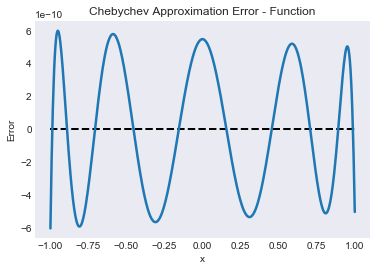

In [11]:
approx_error(f,F,title='Chebychev Approximation Error - Function')

The plot indicates that an order 10 Chebychev approximation scheme, produces approximation errors no bigger in magnitude than $6\times10^{-10}$. The approximation error exhibits the "Chebychev equioscillation property", oscilating relatively uniformly throughout the approximation domain.

This commonly occurs when function being approximated is very smooth, as is the case here but should not be expected when the function is not smooth.  Further notice how the approximation error is exactly 0 at the approximation nodes --- which is true by contruction.

#### Plot first derivative approximation error

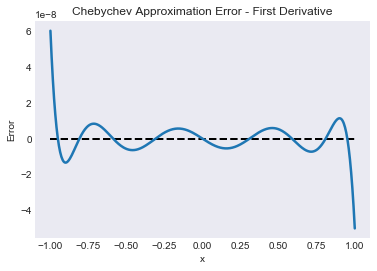

In [12]:
approx_error(d1,F,1, title='Chebychev Approximation Error - First Derivative')

#### Plot second derivative approximation error

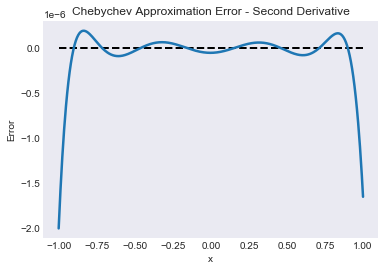

In [13]:
approx_error(d2,F,2, title='Chebychev Approximation Error - Second Derivative')

### Cubic spline interpolation

Let us repeat the approximation exercise, this time constructing a 21-function cubic spline approximant:

In [14]:
n = 21                         # order of approximation
S = BasisSpline(n, a, b, f=f)  # define basis
yapp = S(xgrid)                # approximant values at grid nodes

#### Plot function approximation error

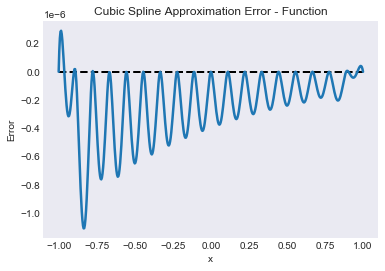

In [15]:
approx_error(f,S,title='Cubic Spline Approximation Error - Function')

The plot indicates that an order 21 cubic spline approximation scheme produces approximation errors no bigger in magnitude than $1.2\times10^{-6}$, about four orders of magnitude worse than with Chebychev polynomials.

#### Plot first derivative approximation error

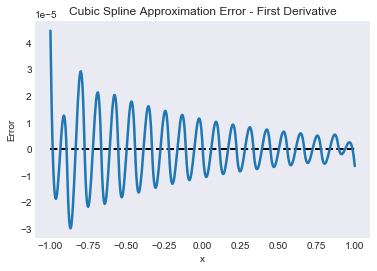

In [16]:
approx_error(d1,S,1, title='Cubic Spline Approximation Error - First Derivative')

#### Plot second derivative approximation error

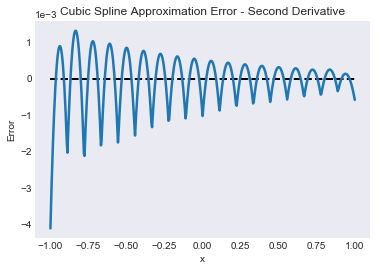

In [17]:
approx_error(d2,S,2, title='Cubic Spline Approximation Error - Second Derivative')

### Linear spline interpolation

Let us repeat the approximation exercise, this time constructing a 31-function linear spline approximant:

In [18]:
n = 31 
L = BasisSpline(n, a, b, k=1, f=f)

#### Plot function approximation error

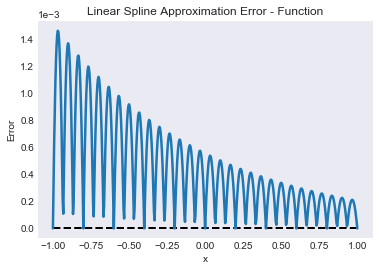

In [19]:
approx_error(f,L,title='Linear Spline Approximation Error - Function')

The plot indicates that an order 21 cubic spline approximation scheme produces approximation errors no bigger in magnitude than $1.2\times10^{-6}$, about four orders of magnitude worse than with Chebychev polynomials.

In [20]:
#demo.savefig(figures)